# Predicting Profit of a startup and deciding upon which one to invest

<b> Predicting profit of startups based on amount spent by it to maintain different aspects of the company (R&D spend, Marketing spend etc etc..),thereby deciding upon which one to invest</b>


## Data preprocessing

### Importing the libraries

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the Dataset

In [133]:
dataset=pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<b> In regression model we need to see check if any of the features are caregorical , in such cases we use dummy variables.
   .Here in out dataset we have Profit as the value we need to predict and others as features. Separating them into two sets of values</b>

In [134]:
X=dataset.iloc[:,:4]
Y=dataset.iloc[:,-1]
X.shape

(50, 4)

In [135]:
dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

### Encoding categorical variable

#### Encoding independent variable

<b>encoding the categorical data i.e State( it takes two values 'New York' or 'California' or 'Florida' ). so we use create three dummy variables </b>  

In [136]:
#from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
ohe=OneHotEncoder(categorical_features=[-1])
le=LabelEncoder()
#ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[-1])],remainder='passthrough')
#X=np.array(ct.fit_transform(X))
##label encoder just encodes column values of categorical variables into numbers
X.State=le.fit_transform(X.State)
##one hot encoder encodes the categorical variables into separate columns.Also we need the result in array format
X=ohe.fit_transform(X).toarray()
X

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

<b> Using only 2 dummy variables to Avoid DUMMY VARIABLE TRAP .
Note: To avoid the dummy variable trap , the dummy variables used is always one less than the number of distinct values takes by the categorical variable.hence dropping the first column<br>
Categorical variable corresponds alphabetically first column='califoria', second column='florida',third='New york'</b>

In [137]:
X=X[:,1:] #dropping the california column

In [138]:
X.shape

(50, 5)

## Spliting the data to training set and test set

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=-0)

## Training Multiple Linear Regression model 

In [140]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict test result

In [141]:
Y_predict=regressor.predict(X_test)

## Visualize the difference in predicted and acutal value

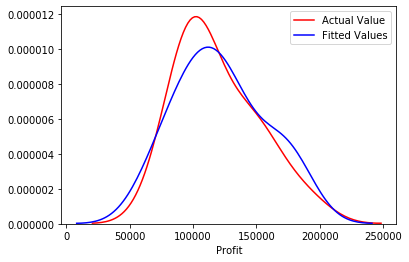

In [142]:
import seaborn as sns

ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)

## Accuracy of the model 

In [143]:
regressor.score(X,Y)*100 ##answer in terms of % 

94.168433478679

## predicting for  a new value

In [144]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<b> The first column refers to FLORIDA, second to NEW YORK . value of 0 in both refers the State as CALIFORNIA</b>

In [145]:
regressor.predict([[0,1,165349.20,136897.80,471784.10]])#testing first row of data set

array([193147.46763469])

In [146]:
regressor.predict([[0,0,162597.70,151377.59,443898.53]])#testing second row of data set

array([191317.50021125])

In [147]:
regressor.predict([[1,0,153441.51,101145.55,407934.54]])#testing third row of data set

array([186329.9424037])

In [148]:
regressor.predict([[1,0,151145.51,107934.55,404040.54]])#testing for profit values in FLorida state

array([184683.75415421])